In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# import and preprocess
df = pd.read_csv('../data/tmdb/processed_tmdb_data.csv')
normalize_features = ['budget', 'revenue']
scaler = StandardScaler()
df[normalize_features] = scaler.fit_transform(df[normalize_features]) #scale budget and revenue

df = df.drop(columns=df.columns[24:249]) #countries and languages are dropped
X = df.drop(columns=['revenue','roi'])#including budget in the predictors because budget is determined in pre-production
y = df['revenue']

print(X.head())

   adult    budget  runtime  release_month  release_year  Action  Adventure  \
0      0 -0.026278    123.0              3          2019       1          0   
1      0  4.387824    133.0             12          2016       1          1   
2      0  1.083553    116.0              5          2017       1          0   
3      0 -0.026278    117.0              1          2012       1          1   
4      0  3.832908    147.0              7          2018       1          1   

   Animation  Comedy  Crime  ...  Horror  Music  Mystery  Romance  \
0          0       0      0  ...       0      0        0        0   
1          0       0      0  ...       0      0        0        0   
2          0       1      1  ...       0      0        0        0   
3          0       0      0  ...       0      0        0        0   
4          0       0      0  ...       0      0        0        0   

   Science Fiction  TV Movie  Thriller  War  zh  Released  
0                0         0         1    0   0   

In [21]:
def correlationHeatmap(X):
    corr_matrix = X.corr()
    img = plt.matshow(
        corr_matrix, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1 
    )
    img.figure.set_size_inches( 10, 8 )
    img.axes.set_xticks(np.arange(corr_matrix.shape[1]), labels= list(corr_matrix.columns), rotation='vertical')
    img.axes.set_yticks(np.arange(corr_matrix.shape[1]), labels=list(corr_matrix.index), rotation='horizontal')
    img.figure.colorbar(img)
    img.axes.set_title("Correlation")
    plt.show()
#correlationHeatmap(X)

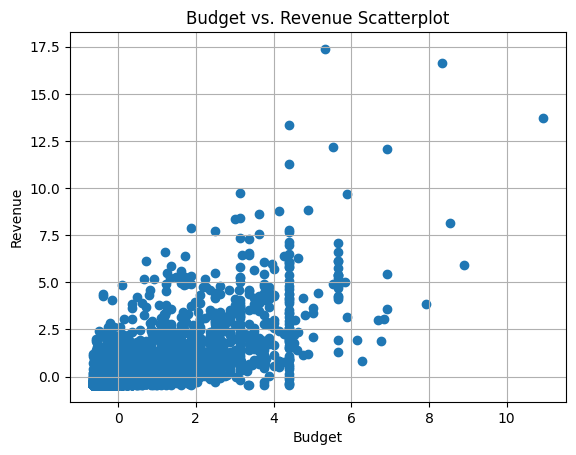

In [25]:
def budget_revenue_plot(X,y):
    plt.scatter(X['budget'], y)
    plt.xlabel('Budget')
    plt.ylabel('Revenue')
    plt.title('Budget vs. Revenue Scatterplot')
    plt.grid(True)
    plt.show()
budget_revenue_plot(X,y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regression_model = LinearRegression().fit(X_train, y_train)

print(f'R^2 score for training set: {regression_model.score(X_train, y_train)}')
print(f'R^2 score for test set: {regression_model.score(X_test, y_test)}')

R^2 score for training set: 0.550956388622382
R^2 score for test set: 0.5864913333045064


In [16]:
def residual(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # output: a list of residuals corresponding to each X in the input
    pred = regression_model.predict(X_test)
    res = (y_test - pred)
    return res


def plotResidualHistogram(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # Compute the residuals using the previous residual function
    # Loop through the attributes and plot a histogram for the residuals
    # Output: None, simply plot the histogram
    # ref - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    plt.hist(residual(regression_model, X_test, y_test), bins=100)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

def plotResidualsVsAttributes(regression_model, X_test, y_test, attributes):
    # inputs: the regression model, test X and test y from the previous question, and a list of columns to plot residuals against
    # Compute the residuals using the previous function
    # Loop through the attributes and plot a scatter plot for each column's data and the residuals
    # Output: None, simply plot the graphs
    residuals = residual(regression_model, X_test, y_test)
    for attribute in attributes:
        plt.figure()
        plt.scatter(X_test[attribute], residuals)
        plt.title(f"Residuals vs {attribute}")
        plt.xlabel(attribute)
        plt.ylabel("Residual")
        plt.show()

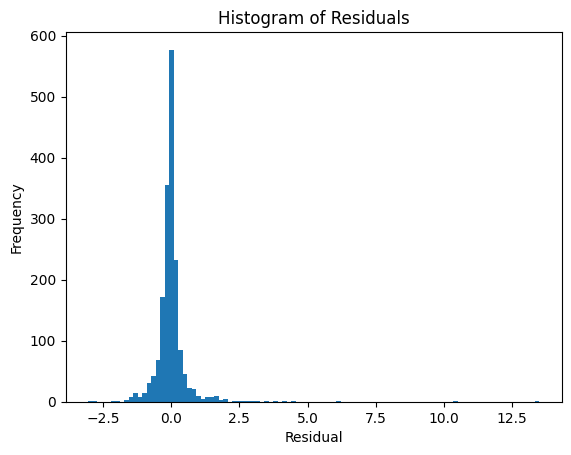

In [17]:
plotResidualHistogram(regression_model, X_test, y_test)

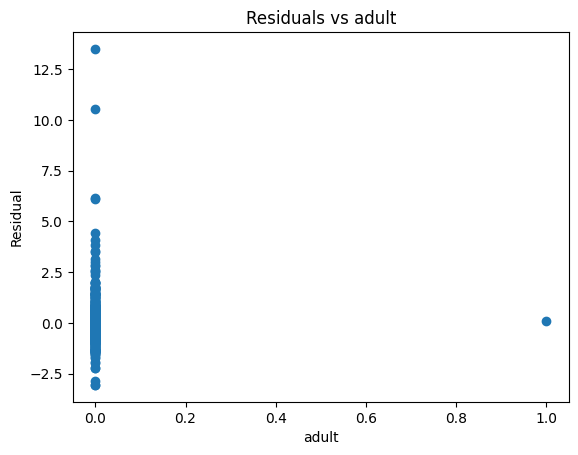

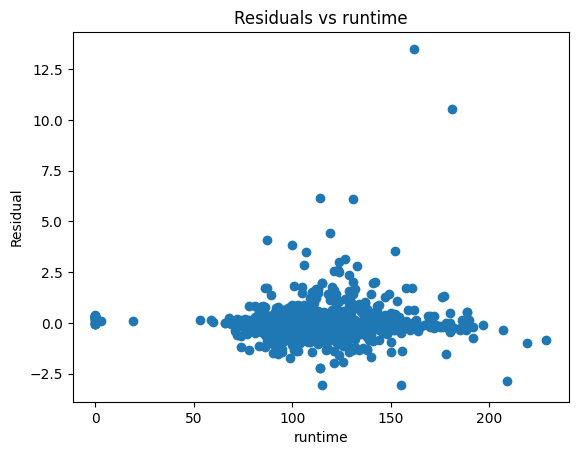

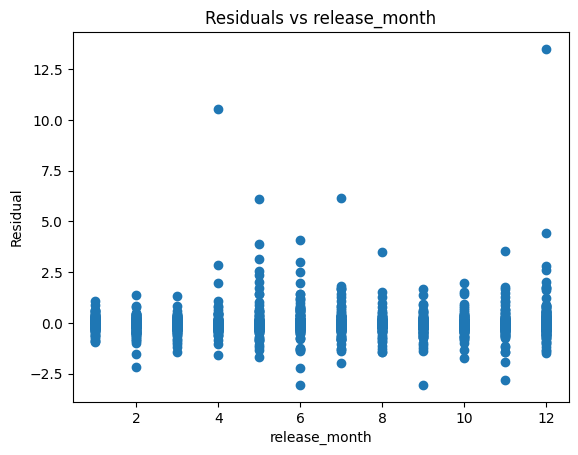

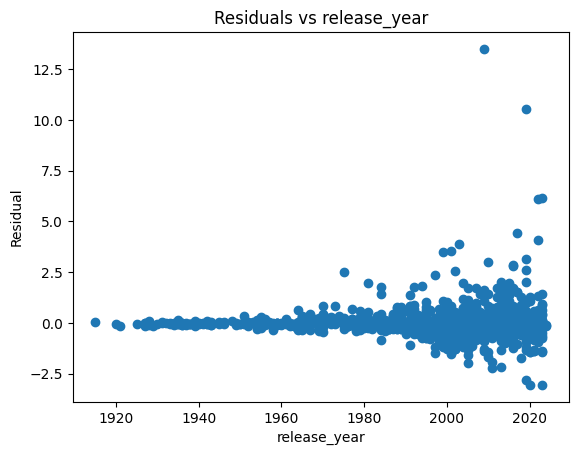

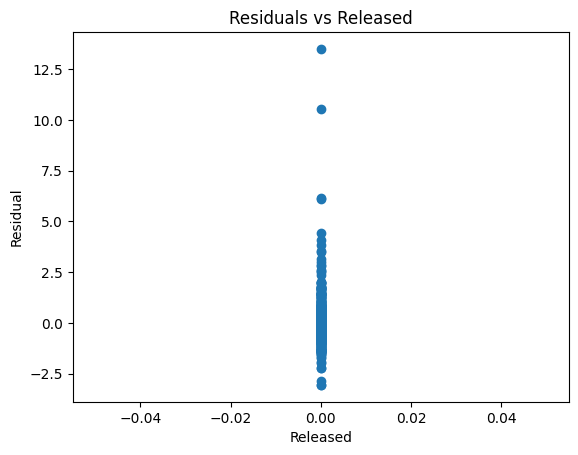

In [18]:
attribute_list = ['adult', 'runtime', 'release_month', 'release_year', 'Released']

attribute_list

plotResidualsVsAttributes(regression_model, X_test, y_test, attribute_list)

In [19]:
from sklearn.kernel_ridge import KernelRidge
np.random.seed(42)

kernel_regression_model = KernelRidge(alpha=0.5, kernel='rbf')
kernel_regression_model.fit(X_train, y_train)

print(f'R^2 score for Kernel Ridge Regression training set: {kernel_regression_model.score(X_train, y_train)}')
print(f'R^2 score for Kernel Ridge Regression test set: {kernel_regression_model.score(X_test, y_test)}')

R^2 score for Kernel Ridge Regression training set: 0.7932132135474588
R^2 score for Kernel Ridge Regression test set: 0.41293981463243434
